NameError: name 'terms' is not defined

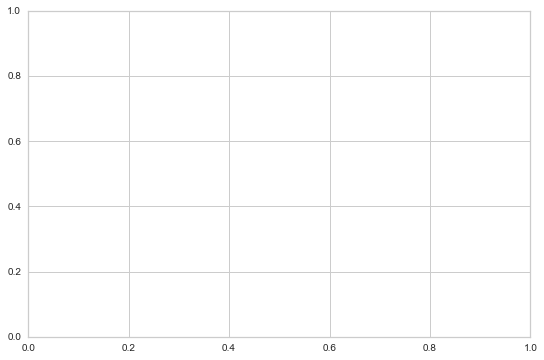

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6))

for term in terms:
    data[term].plot(ax=ax)

ax.set_title("Token Frequency over Time")
ax.set_ylabel("word count")
ax.set_xlabel("publication date")
ax.set_xlim(("2016-02-29","2016-05-25"))
ax.legend()
plt.show()

In [25]:
import itertools
from nltk import sent_tokenize

def cooccurrence(text, cast):
    """
    Takes as input text, a dict of chapter {headings: text},
    and cast, a comma separated list of character names.
    Returns a dictionary of cooccurrence counts for each
    possible pair.
    """
    possible_pairs = list(itertools.combinations(cast, 2))
    cooccurring = dict.fromkeys(possible_pairs, 0)
    for title, chapter in text['chapters'].items():
        for sent in sent_tokenize(chapter):
            for pair in possible_pairs:
                if pair[0] in sent and pair[1] in sent:
                    cooccurring[pair] += 1
    return cooccurring

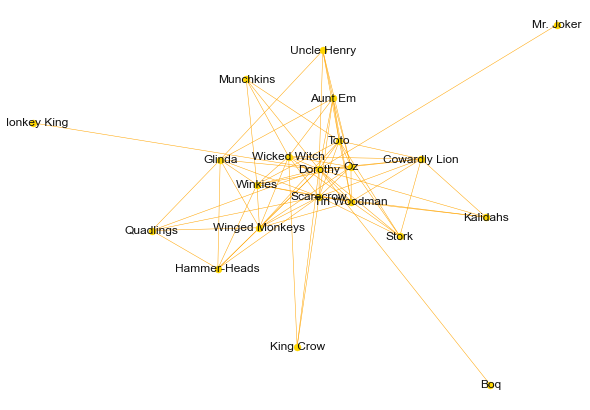

In [26]:
import json
import codecs
import networkx as nx
import matplotlib.pyplot as plt

with codecs.open('../data/oz.json', 'r', 'utf-8-sig') as data:
    text = json.load(data)
    cast = text['cast']

    G = nx.Graph()
    G.name = "The Social Network of Oz"

    pairs = cooccurrence(text, cast)
    for pair, wgt in pairs.items():
        if wgt>0:
            G.add_edge(pair[0], pair[1], weight=wgt)

    # Make Dorothy the center
    D = nx.ego_graph(G, "Dorothy")
    edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())

    # Push nodes away that are less related to Dorothy
    pos = nx.spring_layout(D, k=.5, iterations=40)
    nx.draw(D, pos, node_color="gold", node_size=50, edgelist=edges,
            width=.5, edge_color="orange", with_labels=True, font_size=12)
    plt.show()

In [27]:
from nltk import sent_tokenize
def matrix(text, cast):
    mtx = []
    for first in cast:
        row = []
        for second in cast:
            count = 0
            for title, chapter in text['chapters'].items():
                for sent in sent_tokenize(chapter):
                    if first in sent and second in sent:
                        count += 1
            row.append(count)
        mtx.append(row)
    return mtx

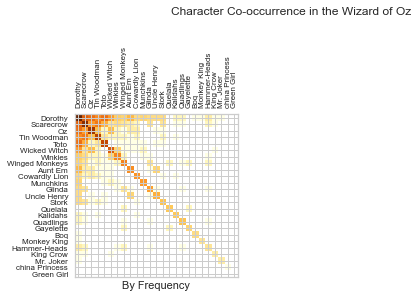

In [28]:
import matplotlib
import numpy as np

# First make the matrices
# By frequency
mtx = matrix(text,cast)

# Now create the plots
fig, ax = plt.subplots()
fig.suptitle('Character Co-occurrence in the Wizard of Oz', fontsize=12)
fig.subplots_adjust(wspace=.75)

n = len(cast)
x_tick_marks = np.arange(n)
y_tick_marks = np.arange(n)

ax1 = plt.subplot(121)
ax1.set_xticks(x_tick_marks)
ax1.set_yticks(y_tick_marks)
ax1.set_xticklabels(cast, fontsize=8, rotation=90)
ax1.set_yticklabels(cast, fontsize=8)
ax1.xaxis.tick_top()
ax1.set_xlabel("By Frequency")
plt.imshow(mtx,
            norm=matplotlib.colors.LogNorm(),
            interpolation='nearest',
            cmap='YlOrBr')

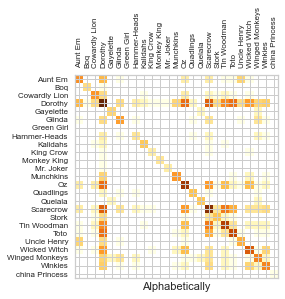

In [29]:
# And alphabetically
alpha_cast = sorted(cast)
alpha_mtx = matrix(text,alpha_cast)

ax2 = plt.subplot(122)
ax2.set_xticks(x_tick_marks)
ax2.set_yticks(y_tick_marks)
ax2.set_xticklabels(alpha_cast, fontsize=8, rotation=90)
ax2.set_yticklabels(alpha_cast, fontsize=8)
ax2.xaxis.tick_top()
ax2.set_xlabel("Alphabetically")
plt.imshow(alpha_mtx,
            norm=matplotlib.colors.LogNorm(),
            interpolation='nearest',
            cmap='YlOrBr')
plt.show()

In [30]:
from nltk import word_tokenize, sent_tokenize

# Plot mentions of characters through chapters
oz_words = []
headings = []
chap_lens = []
for heading, chapter in text['chapters'].items():
    # Collect the chapter headings
    headings.append(heading)
    for sent in sent_tokenize(chapter):
        for word in word_tokenize(sent):
            # Collect all of the words
            # Collect all of the words
            oz_words.append(word)
    # Record the word lengths at each chapter
    chap_lens.append(len(oz_words))

# Mark where chapters start
chap_starts = [0] + chap_lens[:-1]
# Combine with chapter headings
chap_marks = list(zip(chap_starts,headings))

In [31]:
cast.reverse()
points = []
# Add a point for each time a character appears
for y in range(len(cast)):
    for x in range(len(oz_words)):
        # Some characters have 1-word names
        if len(cast[y].split()) == 1:
            if cast[y] == oz_words[x]:
                points.append((x,y))
        # Some characters have 2-word names
        else:
            if cast[y] == ' '.join((oz_words[x-1], oz_words[x])):
                points.append((x,y))
if points:
    x, y = list(zip(*points))
else:
    x = y = ()

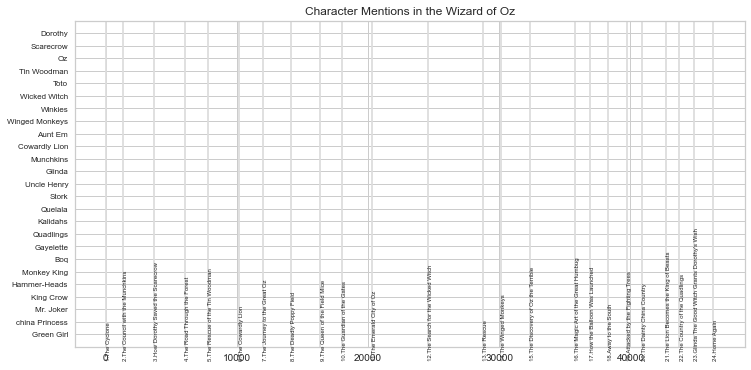

In [32]:
# Create the plot
fig, ax = plt.subplots(figsize=(12,6))
# Add vertical lines labeled for each chapter start
for chap in chap_marks:
    plt.axvline(x=chap[0], linestyle='-',
        color='gainsboro')
    plt.text(chap[0], -2, chap[1], size=6, rotation=90)
# Plot the character mentions
plt.plot(x, y, "|", color="darkorange", scalex=.1)
plt.tick_params(
    axis='x', which='both', bottom='off', labelbottom='off'
)
plt.yticks(list(range(len(cast))), cast, size=8)
plt.ylim(-1, len(cast))
plt.title("Character Mentions in the Wizard of Oz")
plt.show()

In [33]:
import nltk

grammar=r'KT: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}'
chunker = nltk.chunk.regexp.RegexpParser(grammar)

In [35]:
from nltk import pos_tag, word_tokenize
from yellowbrick.text.postag import PosTagVisualizer


pie = """
    In a small saucepan, combine sugar and eggs
    until well blended. Cook over low heat, stirring
    constantly, until mixture reaches 160° and coats
    the back of a metal spoon. Remove from the heat.
    Stir in chocolate and vanilla until smooth. Cool
    to lukewarm (90°), stirring occasionally. In a small
    bowl, cream butter until light and fluffy. Add cooled
    chocolate mixture; beat on high speed for 5 minutes
    or until light and fluffy. In another large bowl,
    beat cream until it begins to thicken. Add
    confectioners' sugar; beat until stiff peaks form.
    Fold into chocolate mixture. Pour into crust. Chill
    for at least 6 hours before serving. Garnish with
    whipped cream and chocolate curls if desired.
    """

tokens = word_tokenize(pie)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))
print('\n')

AttributeError: 'PosTagVisualizer' object has no attribute 'tagged'

In [36]:
import os
import yellowbrick as yb
from sklearn.datasets.base import Bunch

## The path to the test datasets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Corpus loading mechanisms
corpora = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}

def load_corpus(name):
    """
    Loads and wrangles the passed in text corpus by name.
    """

    # Get the path from the datasets
    path = corpora[name]

    # Read the directories in the directory as the categories.
    categories = [
        cat for cat in os.listdir(path)
        if os.path.isdir(os.path.join(path, cat))
    ]

    files  = [] # holds the filenames relative to the root
    data   = [] # holds the text read from the file
    target = [] # holds the string of the category

    # Load the data from the files in the corpus
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)

            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())

    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

corpus = load_corpus('hobbies')

FileNotFoundError: [Errno 2] No such file or directory: '/home/af/Dokumenter/Programs/AppliedTextAnalysiswithPython/Chapter 8/data/hobbies'

In [15]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(corpus.data)
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

NameError: name 'corpus' is not defined

In [16]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(corpus.data)

features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

NameError: name 'corpus' is not defined

In [17]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.data)

tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

NameError: name 'corpus' is not defined

In [18]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

NameError: name 'docs' is not defined

In [19]:
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target

tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

NameError: name 'corpus' is not defined

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport

corpus = load_corpus('hobbies')
docs   = TfidfVectorizer().fit_transform(corpus.data)
labels = corpus.target

X_train, X_test, y_train, y_test = train_test_split(
    docs.toarray(), labels, test_size=0.2
)

visualizer = ClassificationReport(GaussianNB(), classes=corpus.categories)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

FileNotFoundError: [Errno 2] No such file or directory: '/home/af/Dokumenter/Programs/AppliedTextAnalysiswithPython/Chapter 8/data/hobbies'

In [21]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

visualizer = ConfusionMatrix(LogisticRegression(), classes=corpus.categories)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

NameError: name 'corpus' is not defined

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(KMeans(n_clusters=6))
visualizer.fit(docs)
visualizer.poof()

NameError: name 'docs' is not defined

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), metric='silhouette', k=[4,10])
visualizer.fit(docs)
visualizer.poof()

NameError: name 'docs' is not defined